# Loan Eligibility Prediction

### Importing libraries

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
enco=LabelEncoder()

### Loading the data

In [97]:
data=pd.read_csv("S:\\Data Science\\Projects\\Loan Eligibility Prediction\\Dataset\\Train.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [98]:
data.shape, type(data)

((614, 13), pandas.core.frame.DataFrame)

There are 614 rows and 13 columns in the dataset

# Statistical Measures

In [99]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Missing values in each column

In [101]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Handling the NaN values

### Let's fill the NaN values with the mode values in catagorical columns

In [102]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
# To update the value of the mode in a catagorical column we have to specify the index

In [103]:
data['Married'].fillna(data['Married'].mode()[0],inplace=True)

In [104]:
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)

In [105]:
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)

In [106]:
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)

In [107]:
data.Loan_Amount_Term.value_counts()*100/len(data)

360.0    83.387622
180.0     7.166124
480.0     2.442997
300.0     2.117264
84.0      0.651466
240.0     0.651466
120.0     0.488599
36.0      0.325733
60.0      0.325733
12.0      0.162866
Name: Loan_Amount_Term, dtype: float64

In [108]:
# More than 83% people have Loan_Amount_Term=360 so fill the NaN values with 360.0
data['Loan_Amount_Term'].fillna(360.0,inplace=True)

In [109]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [110]:
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)

In [111]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Misssing values have been treated

In [112]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


# Seggregation of the dataset into features and target

In [85]:
features=data.drop('Loan_Status',axis=1)
target=data['Loan_Status']

In [86]:
features.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban


In [87]:
target.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

# EDA

### Transform the target column to numreric(0,1)

In [114]:
target.replace({'N':0,'Y':1},inplace=True)

In [118]:
target.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [121]:
 features.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Let's replace 3+ to 4

In [133]:
features.Dependents.replace({'3+':4},inplace=True)
features.Dependents.value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

### Let's put Label Encoding to the catagorical columns

In [153]:
features['gender']=enco.fit_transform(features['Gender'])

In [158]:
features['married']=enco.fit_transform(features['Married'])

In [160]:
features['education']=enco.fit_transform(features['Education'])

In [162]:
features['selfemployed']=enco.fit_transform(features['Self_Employed'])

In [166]:
features['property_area']=enco.fit_transform(features['Property_Area'])

In [168]:
features['total_income']=features['CoapplicantIncome']+features['ApplicantIncome']

C:\Users\ashis\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_income'>

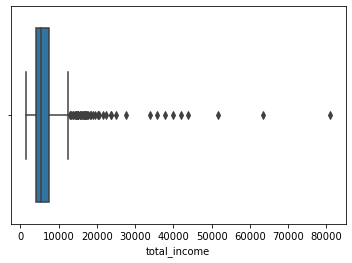

In [178]:
sns.boxplot(features.total_income)

{'whiskers': [<matplotlib.lines.Line2D at 0x21eaff7da90>,
 'caps': [<matplotlib.lines.Line2D at 0x21eaff88190>,
 'boxes': [<matplotlib.lines.Line2D at 0x21eaff7d730>],
 'medians': [<matplotlib.lines.Line2D at 0x21eaff88850>],
 'fliers': [<matplotlib.lines.Line2D at 0x21eaff88bb0>],
 'means': []}

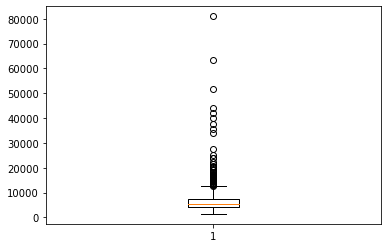

In [179]:
plt.boxplot(features.total_income)

<AxesSubplot:>

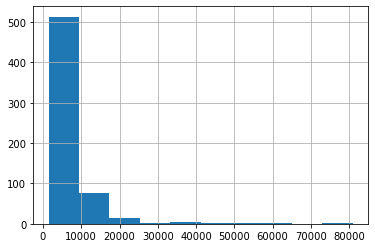

In [175]:
features.total_income.hist()

In [182]:
features.total_income.quantile(0.01),features.total_income.quantile(0.99),features.total_income.max()

(2141.51, 37453.02000000001, 81000.0)

### Let's normalize the total_income using log method

In [183]:
features['total_income_log']=np.log(features['total_income'])

{'whiskers': [<matplotlib.lines.Line2D at 0x21eaffe6040>,
 'caps': [<matplotlib.lines.Line2D at 0x21eaffe6700>,
 'boxes': [<matplotlib.lines.Line2D at 0x21eaffd9ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x21eaffe6dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21eaffef160>],
 'means': []}

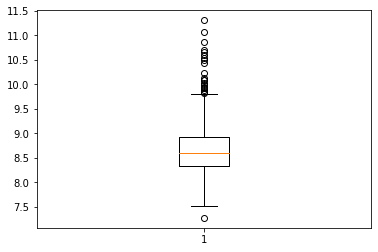

In [185]:
plt.boxplot(features.total_income_log)

In [187]:
features.total_income_log.describe(),features.total_income.describe()

(count    614.000000
 mean       8.669414
 std        0.545102
 min        7.273786
 25%        8.334712
 50%        8.597205
 75%        8.925549
 max       11.302204
 Name: total_income_log, dtype: float64,
 count      614.000000
 mean      7024.705081
 std       6458.663872
 min       1442.000000
 25%       4166.000000
 50%       5416.500000
 75%       7521.750000
 max      81000.000000
 Name: total_income, dtype: float64)

<AxesSubplot:>

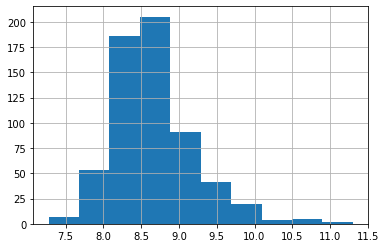

In [189]:
features.total_income_log.hist()

total_income_log is normalised now.

In [191]:
features

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,gender,married,education,selfemployed,property_area,total_income,total_income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1,0,0,0,2,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,1,1,0,0,0,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1,1,0,1,2,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1,1,1,0,2,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1,0,0,0,2,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,0,0,0,0,0,2900.0,7.972466
610,LP002979,Male,Yes,4,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,1,1,0,0,0,4106.0,8.320205
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,1,1,0,0,2,8312.0,9.025456
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,1,1,0,0,2,7583.0,8.933664


### Let's drop extra columns

In [200]:
X=features.iloc[:,8:11]

In [202]:
X=pd.concat([X,features.iloc[:,12:]],axis=1)

In [208]:
X.drop(['total_income'],axis=1,inplace=True)

In [209]:
X

,LoanAmount,Loan_Amount_Term,Credit_History,gender,married,education,selfemployed,property_area,total_income_log
0,146.412162,360.0,1.0,1,0,0,0,2,8.674026
1,128.000000,360.0,1.0,1,1,0,0,0,8.714568
2,66.000000,360.0,1.0,1,1,0,1,2,8.006368
3,120.000000,360.0,1.0,1,1,1,0,2,8.505323
4,141.000000,360.0,1.0,1,0,0,0,2,8.699515
...,...,...,...,...,...,...,...,...,...
609,71.000000,360.0,1.0,0,0,0,0,0,7.972466
610,40.000000,180.0,1.0,1,1,0,0,0,8.320205
611,253.000000,360.0,1.0,1,1,0,0,2,9.025456
612,187.000000,360.0,1.0,1,1,0,0,2,8.933664


In [214]:
X.Loan_Amount_Term.value_counts()*100/len(X)

360.0    85.667752
180.0     7.166124
480.0     2.442997
300.0     2.117264
84.0      0.651466
240.0     0.651466
120.0     0.488599
36.0      0.325733
60.0      0.325733
12.0      0.162866
Name: Loan_Amount_Term, dtype: float64

### Let's club the 12,60,36,120,84,240 into 120

In [217]:
X.Loan_Amount_Term.replace({12.0:120.0,60.0:120.0,36.0:120.0,240.0:120.0,84.0:120.0},inplace=True)

In [218]:
X.Loan_Amount_Term.value_counts()*100/len(X)

360.0    85.667752
180.0     7.166124
120.0     2.605863
480.0     2.442997
300.0     2.117264
Name: Loan_Amount_Term, dtype: float64

(array([ 16.,  44.,   0.,   0.,   0.,  13., 526.,   0.,   0.,  15.]),
 array([120., 156., 192., 228., 264., 300., 336., 372., 408., 444., 480.]),
 <BarContainer object of 10 artists>)

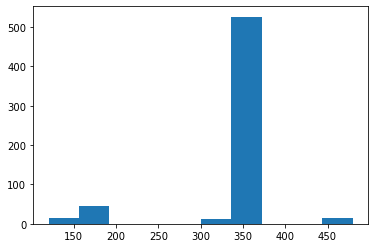

In [219]:
plt.hist(X.Loan_Amount_Term)

In [220]:
X.Loan_Amount_Term.replace({480.0:300.0,120.0:300.0},inplace=True)

In [225]:
X.Loan_Amount_Term.value_counts()*100/len(X)

360.0    85.667752
300.0     7.166124
180.0     7.166124
Name: Loan_Amount_Term, dtype: float64

In [226]:
X

,LoanAmount,Loan_Amount_Term,Credit_History,gender,married,education,selfemployed,property_area,total_income_log
0,146.412162,360.0,1.0,1,0,0,0,2,8.674026
1,128.000000,360.0,1.0,1,1,0,0,0,8.714568
2,66.000000,360.0,1.0,1,1,0,1,2,8.006368
3,120.000000,360.0,1.0,1,1,1,0,2,8.505323
4,141.000000,360.0,1.0,1,0,0,0,2,8.699515
...,...,...,...,...,...,...,...,...,...
609,71.000000,360.0,1.0,0,0,0,0,0,7.972466
610,40.000000,180.0,1.0,1,1,0,0,0,8.320205
611,253.000000,360.0,1.0,1,1,0,0,2,9.025456
612,187.000000,360.0,1.0,1,1,0,0,2,8.933664


# Let's split the data into train and test data

In [227]:
from sklearn.model_selection import train_test_split

In [235]:
X_train,X_test,Y_train,Y_test=train_test_split(X,target,test_size=0.2,random_state=0)

In [236]:
X_train.shape, X_test.shape,Y_train.shape, Y_test.shape

((491, 9), (123, 9), (491,), (123,))

In [237]:
X_train

,LoanAmount,Loan_Amount_Term,Credit_History,gender,married,education,selfemployed,property_area,total_income_log
90,131.0,360.0,1.0,1,1,0,0,1,8.675564
533,196.0,360.0,1.0,1,0,0,0,1,9.328123
452,149.0,360.0,0.0,1,1,0,0,0,8.644883
355,116.0,180.0,1.0,0,0,0,0,2,8.246172
266,150.0,360.0,1.0,1,1,0,0,1,8.715224
...,...,...,...,...,...,...,...,...,...
277,80.0,360.0,1.0,1,1,0,0,2,8.390041
9,349.0,360.0,1.0,1,1,0,0,1,10.077819
359,200.0,360.0,1.0,1,1,0,0,1,9.028099
192,160.0,360.0,1.0,1,1,1,0,2,8.705000


In [240]:
Y_train

90     1
533    0
452    0
355    1
266    1
      ..
277    1
9      0
359    1
192    0
559    1
Name: Loan_Status, Length: 491, dtype: int64

# Data Modelling

## Let's scale the dataset first

In [245]:
from sklearn.preprocessing import StandardScaler
ssr=StandardScaler()
X_train=ssr.fit_transform(X_train)
X_test=ssr.fit_transform(X_test)

## Let's apply Decision Tree Algorithm

In [248]:
# Importing Decision Tree

from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier(criterion='entropy',random_state=0)
DTC.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

# Let's do the prediction using test data

In [249]:
pred=DTC.predict(X_test)
pred

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

# Let's check the accuracy

In [253]:
from sklearn import metrics 
acc=metrics.accuracy_score(pred,Y_test)
print(f'The accuracy of the model is {acc}')

The accuracy of the model is 0.6991869918699187


# Let's apply naive_bayes algorithm

In [255]:
from sklearn.naive_bayes import GaussianNB
nbc=GaussianNB()
nbc.fit(X_train,Y_train)

GaussianNB()

# Prediction

In [258]:
pred_y=nbc.predict(X_test)
pred_y

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

# Accuracy check

In [260]:
acr=metrics.accuracy_score(pred_y,Y_test)

In [261]:
print(f'The accuracy is  {acr}')

The accuracy is  0.8292682926829268


# Let's transfer the filtered data to a csv file for deployment

In [ ]:
dataset=pd.concat([X,target],axis=1)

In [308]:
dataset.to_csv('S:\\Data Science\\Projects\\My Projects.csv',index=False)

In [285]:
array=dataset.values[:,0:]

In [286]:
array

array([[146.41216216, 360.        ,   1.        , ...,   2.        ,
          8.67402599,   1.        ],
       [128.        , 360.        ,   1.        , ...,   0.        ,
          8.71456755,   0.        ],
       [ 66.        , 360.        ,   1.        , ...,   2.        ,
          8.00636757,   1.        ],
       ...,
       [253.        , 360.        ,   1.        , ...,   2.        ,
          9.02545553,   1.        ],
       [187.        , 360.        ,   1.        , ...,   2.        ,
          8.93366418,   1.        ],
       [133.        , 360.        ,   0.        , ...,   1.        ,
          8.43010908,   0.        ]])

# Before saving the model for deployment we work on value arrays that's why I hvae converted the dataset into an array and saved to the variable array